# Introduction to AI Part 1: Examples

## Supervised Learning Examples

In Supervised Learning, we have a dataset consisting of both features and labels. The task is to construct a model which is able to predict the label of an object given the set of features. Some examples are:

- given a multicolor image of an object through a telescope, determine whether that object is a star, a quasar, or a galaxy.
- given a photograph of a person, identify the person in the photo.
- given a list of movies a person has watched and their personal rating of the movie, recommend a list of movies they would like (recommender systems: a famous example is the Netflix Prize).

What these tasks have in common is that there is one or more unknown quantities associated with the object which needs to be determined from other observed quantities.

Supervised learning is further broken down into two categories, **classification** and **regression**. In **classification**, the label is discrete, while in **regression**, the label is continuous.

Examples adapted from: https://github.com/jakevdp/sklearn_tutorial/blob/master/notebooks/02.2-Basic-Principles.ipynb

### Classification Example
We'll show one of the simplest classification algorithms called K nearest neighbors (https://scikit-learn.org/stable/modules/neighbors.html). The basic idea is simple. When you have new data and want to make a prediction, you look up in the data cases in which the new data features are similar to exiting data features and you use the label from similar existing data as your prediction for the new data. In short, find similar data where you know the truth, and assume the truth is the same because the feature data is similar. There are obviously many more complex classifiers but this should make a good example.

In [1]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn.fit(X, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = knn.predict([[3, 5, 4, 2],])
print(iris.target_names[result])

['versicolor']


Instead of directly predicting, you can use probabilistic predictions (aka predictive 'score').

In [2]:
knn.predict_proba([[3, 5, 4, 2],])

array([[0.        , 0.66666667, 0.33333333]])

(4.180808080808081, 8.019191919191918, 1.8868686868686868, 4.513131313131313)

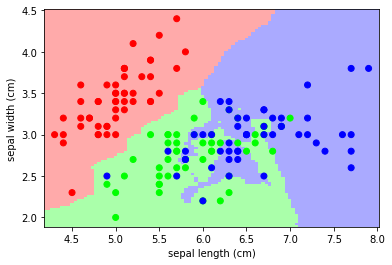

In [3]:
import numpy as np
import pylab as pl

X = iris.data[:, :2]  # we only take the first two features for simplicity of the plot
y = iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Build up data for the plot
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Define color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure()
pl.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot also the training points
pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
pl.xlabel('sepal length (cm)')
pl.ylabel('sepal width (cm)')
pl.axis('tight')

### Regression Example
We'll also stick with a very simple regression model for our example. Fitting a line to data is the most basic form of regression. There are of course many more sophisticated regression models available.

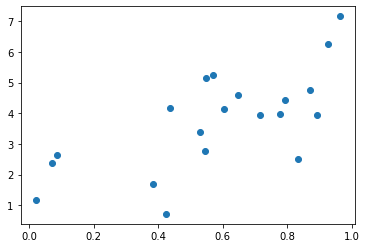

In [4]:
# Create some simple data
import numpy as np
import pylab as pl

np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)
pl.plot(X.squeeze(), y, 'o');

Using this random data, let's find and plot a line of best fit. We can use this line to predict new data!

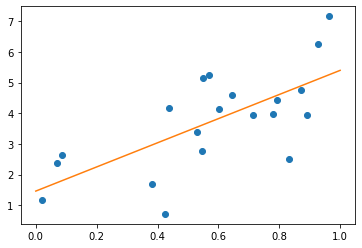

In [5]:
from sklearn.linear_model import LinearRegression
import pylab as plt

model = LinearRegression()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

We can use a more sophisticated example to do a better job at regressing. Let's look at the results from a Random Forest Regressor (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

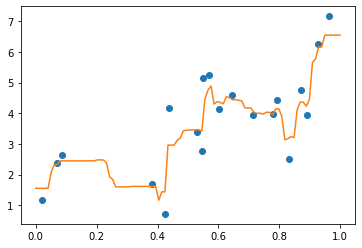

In [6]:
# Fit a Random Forest
from sklearn.ensemble import RandomForestRegressor
import pylab as plt

model = RandomForestRegressor()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

## Unsupervised Learning Examples

There are many, many forms of unsupervised learning. Two of the most popular are clustering and dimensionality reduction.

Unsupervised Learning addresses a different sort of problem than supervised learning. Here the data has no labels and we are interested in finding similarities between the objects in question. In a sense, you can think of unsupervised learning as a means of discovering labels from the data itself. Unsupervised learning comprises tasks such as dimensionality reduction, clustering, and density estimation. For example, in the iris data discussed above, we can used unsupervised methods to determine combinations of the measurements which best display the structure of the data. As we'll see below, such a projection of the data can be used to visualize the four-dimensional dataset in two dimensions. Some more involved unsupervised learning problems are:

- given detailed observations of distant galaxies, determine which features or combinations of features best summarize the information.
- given a mixture of two sound sources (for example, a person talking over some music), separate the two (this is called the blind source separation problem).
- given a video, isolate a moving object and categorize in relation to other moving objects which have been seen.

Sometimes the two may even be combined: e.g. Unsupervised learning can be used to find useful features in heterogeneous data, and then these features can be used within a supervised framework.

Examples adapted from: https://github.com/jakevdp/sklearn_tutorial/blob/master/notebooks/02.2-Basic-Principles.ipynb

### Clustering
As with previous example, we'll use a simple clustering algorithm, K-means (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

Clustering groups together observations that are homogeneous with respect to a given criterion, finding ''clusters'' in the data. Note that these clusters will uncover relevant hidden structure of the data only if the criterion used highlights it. This is one of the main uses for unsupervised learning.

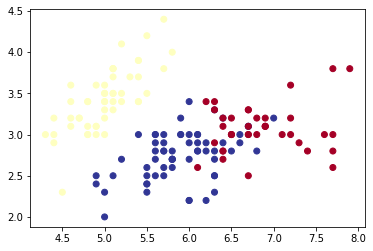

In [7]:
X, y = iris.data, iris.target

from sklearn.cluster import KMeans
import pylab as plt

k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred,
           cmap='RdYlBu');

### Dimensionality Reduction: PCA
Principle Component Analysis (PCA) is a dimension reduction technique that can find the combinations of variables that explain the most variance. Using the IRIS dataset, we'll use PCA to extract 2 features from the 4 available.

In [8]:
X, y = iris.data, iris.target

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape: {}".format(X_reduced.shape))

Reduced dataset shape: (150, 2)


Meaning of the 2 components:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


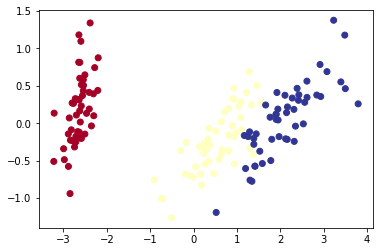

In [9]:
import pylab as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='RdYlBu')

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join('%.3f x %s' % (value, name) for value, name in zip(component, iris.feature_names)))

## Reinforcement Learning Example
This will show a basic toy example of RL including a toy environment. This example will be covered in more detail in the RL lecture.

In [10]:
from enum import IntEnum
import numpy as np
import matplotlib.pyplot as plt
import random

In [11]:
class Action(IntEnum):
    UP = 1
    DOWN = -1

In [12]:
class Environment:
    
    action_space = list(Action)
    state_space = [0, 1, 2, 3, 4, 5, 6]
    
    def __init__(self):
        self.state = 3
        self.reward = 0

    def step(self, action):
        done = self.is_done()
        if self.state == 0:
            self.reward += 1
        elif self.state == 6:
            self.reward += 10
        else:
            self.state += action
        info = {}
        return self.state, self.reward , done, info

    def reset(self):
        self.state = 3
        self.reward = 0

    def is_done(self):
        return self.state == 0 or self.state == 6

In [13]:
class RandomAgent:

    def __init__(self, name):
        self.name = name

    def get_action(self):
        random_choice = random.randint(0, 1)
        if (random_choice == 0):
            return Action.UP
        else:
            return Action.DOWN
    
    def update(self, state, action, reward, next_state, done):
        # For training
        pass

In [14]:
basic_env = Environment()
rl_agent = RandomAgent('Random')
for _ in range(10):
    basic_env.reset()
    done = False
    while not done:
        action = rl_agent.get_action()
        obs, reward, done, info = basic_env.step(action)
        if done:
            print('Episode Reward: {}'.format(reward))

Episode Reward: 10
Episode Reward: 10
Episode Reward: 1
Episode Reward: 1
Episode Reward: 1
Episode Reward: 10
Episode Reward: 1
Episode Reward: 1
Episode Reward: 10
Episode Reward: 10


In [15]:
class StochasticAgent:

    def __init__(self, probability_up):
        self.p_up = probability_up

    def get_action(self):
        if np.random.random() < self.p_up:
            return Action.UP
        else:
            return Action.DOWN

In [16]:
def plot(epsilon=0.1, xs=np.arange(0.01, 1, 0.01).tolist(), n_episodes=1000):
    x_epsilon_down = epsilon / 2
    x_epsilon_up = 1 - epsilon / 2
    xs.extend([x_epsilon_down, x_epsilon_up])
    xs.sort()
    i_epsilon_up = xs.index(x_epsilon_up)
    i_epsilon_down = xs.index(x_epsilon_down)

    average_rewards = []
    for p_up in xs:
        env = Environment()
        agent = StochasticAgent(p_up)

        total_reward = 0
        for _ in range(n_episodes):
            env.reset()
            total_episode_reward = 0
            done = False
            while not done:
                action = agent.get_action()
                _, reward, done, _ = env.step(action)
                total_episode_reward += reward

            total_reward += total_episode_reward

        average_rewards.append(total_reward / n_episodes)

    max_pt = (xs[np.argmax(average_rewards)], np.max(average_rewards))
    epsilon_down_pt = (xs[i_epsilon_down], average_rewards[i_epsilon_down])
    epsilon_up_pt = (xs[i_epsilon_up], average_rewards[i_epsilon_up])

    print('Optimal Policy Probability: {:.2f}'.format(max_pt[0]))
    print('Optimal Policy Reward     : {:.2f}'.format(max_pt[1]))
    print('Epsilon Down Reward       : {:.2f}'.format(epsilon_down_pt[1]))
    print('Epsilon UP Reward      : {:.2f}'.format(epsilon_up_pt[1]))
    
    plt.plot(xs, average_rewards)

    plt.xlim(0, 1)
    plt.xlabel('Probability of Selecting UP')
    plt.ylim(0, 11)
    plt.ylabel('Reward')
    plt.show()

Optimal Policy Probability: 0.92
Optimal Policy Reward     : 10.00
Epsilon Down Reward       : 1.00
Epsilon UP Reward      : 10.00


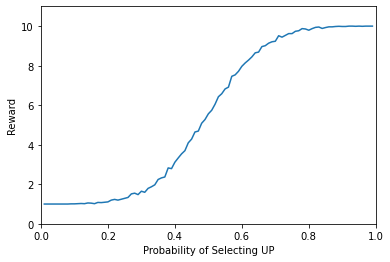

In [17]:
plot()

## Common ML Metrics

Imagine we use ML to make some predictions using a binary classifier. This could be if it will rain at our location over the next 10 days. How do we know how well our model predicted this? Adapted from: https://github.com/housecricket/notebooks/blob/master/coronavirus.ipynb

In [18]:
y_pred = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In this case, we mostly predicted things correctly except we got one wrong. It's helpful to consider the rates of true positive, true negatives, false positives, and false negatives. These are usually the most basic ML metrics along with accuracy.<br>
We can see all of these at once using a confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print('True Positives: {}'.format(tp))
print('True Negatives: {}'.format(tn))
print('False Positives: {}'.format(fp))
print('False Negatives: {}'.format(fn))
print()
import pandas as pd
cmtx = pd.DataFrame(
    confusion_matrix(y_true, y_pred, labels=[1, 0]), 
    index=['true:1', 'true:0'], 
    columns=['pred:1', 'pred:0']
)
print(cmtx)

True Positives: 5
True Negatives: 4
False Positives: 1
False Negatives: 0

        pred:1  pred:0
true:1       5       0
true:0       1       4


A lot of other ML metrics are built from these building blocks. We'll cover some of them below.
<br><br>
The wikipedia page on this is excellent!. https://en.wikipedia.org/wiki/Confusion_matrix
<br><br>
Recall (aka sensitivity): percentage of days correctly identified as being rainy.

In [20]:
recall = tp / (tp + fn)
print('Recall: {}'.format(recall))

Recall: 1.0


Precision: percentage of days correctly identified as being rainy out of all days rain was predicted

In [21]:
precision = tp / (tp + fp)
print('Precision: {}'.format(precision))

Precision: 0.8333333333333334


NPV: negative (not rainy) predicted results that are truly negative

In [22]:
npv = tn / (tn + fn)
print('NPV: {}'.format(npv))

NPV: 1.0


False Negative Rate (miss rate): ratio of actual rainy days that were predicted to be not rainy

In [23]:
fnr = fp / (fn + tp)
print('FNR: {}'.format(fnr))

FNR: 0.2


False Positive Rate: ratio of not rainy days predicted to be rainy to all predicted rainy days

In [24]:
fpr = fp / (fp + tp)
print('FPR: {}'.format(fpr))

FPR: 0.16666666666666666


Accuracy: how many predictions we got right out of all the predictions

In [25]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy: {}'.format(accuracy))

Accuracy: 0.9


The last ML metric we will discuss is the ROC curve. ROC - Receiver Operating Characteristic - curves show how well the classifier does as you change the true positive rate and the false positive rate. This is a very common way of showing how well a classifier performs. There are also many variations of this concept.

In [26]:
# Scores are the probability of the given prediction, often provided by the classifier when the prediction is made.
# Remember there were 10 days in total, so we need 10 scores, 1 for each prediction.
# We'll set the scores for the rainy day predictions slightly higher to show good classifier performance.
# NOTE: these were randomly generated for this example, these values are usually provided by the classifier.
scores = [0.082, 0.26, 0.14, 0.382, 0.38, 0.26, 0.64,  0.48,  0.26,  0.62]
print('True labels: {}'.format(y_true))
print('Scores: {}'.format(scores))

True labels: [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
Scores: [0.082, 0.26, 0.14, 0.382, 0.38, 0.26, 0.64, 0.48, 0.26, 0.62]


In [27]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, scores, pos_label = 1)
print('Thresholds: {}'.format(thresholds))
print('False Positive Rate (fpr): {}'.format(fpr))
print('True Positive Rate (tpr): {}'.format(tpr))

Thresholds: [1.64  0.64  0.48  0.38  0.26  0.082]
False Positive Rate (fpr): [0.  0.  0.  0.4 0.6 1. ]
True Positive Rate (tpr): [0.  0.2 0.6 0.6 1.  1. ]


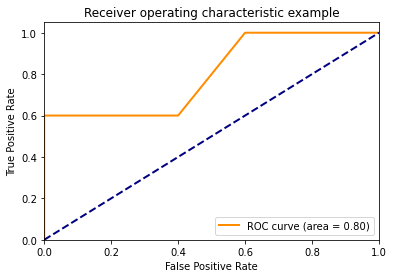

In [28]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()